+ 博客來網站
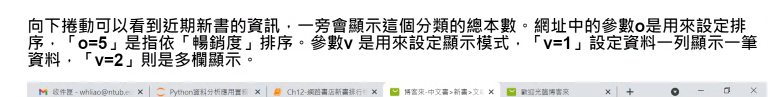

In [1]:
import requests
from bs4 import BeautifulSoup

kindno = 1   # 要下載的書籍分類，預設為第1分類:文學小說
homeurl = "https://www.books.com.tw/web/books_nbtopm_01/?v=1&o=5"
mode = '?v=1&o=5'
url = "http://www.books.com.tw/web/books_nbtopm_"
# 讓網頁判斷我們不是機器人 (下面 headers那行)
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html = requests.get(homeurl,headers=headers).text
soup = BeautifulSoup(html,'lxml')


# 中文新書分類，取得分類資訊
res = soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs = res.select("a")    # 找出所有a
print(hrefs)


[<a href="https://www.books.com.tw/web/books_nbtopm_01/?loc=P_0003_001">文學小說</a>, <a href="https://www.books.com.tw/web/books_nbtopm_02/?loc=P_0003_002">商業理財</a>, <a href="https://www.books.com.tw/web/books_nbtopm_03/?loc=P_0003_003">藝術設計</a>, <a href="https://www.books.com.tw/web/books_nbtopm_04/?loc=P_0003_004">人文社科</a>, <a href="https://www.books.com.tw/web/books_nbtopm_07/?loc=P_0003_005">心理勵志</a>, <a href="https://www.books.com.tw/web/books_nbtopm_12/?loc=P_0003_006">宗教命理</a>, <a href="https://www.books.com.tw/web/books_nbtopm_06/?loc=P_0003_007">自然科普</a>, <a href="https://www.books.com.tw/web/books_nbtopm_08/?loc=P_0003_008">醫療保健</a>, <a href="https://www.books.com.tw/web/books_nbtopm_09/?loc=P_0003_009">飲食</a>, <a href="https://www.books.com.tw/web/books_nbtopm_10/?loc=P_0003_010">生活風格</a>, <a href="https://www.books.com.tw/web/books_nbtopm_11/?loc=P_0003_011">旅遊</a>, <a href="https://www.books.com.tw/web/books_nbtopm_14/?loc=P_0003_012">童書/青少年文學</a>, <a href="https://www.books.

In [2]:
kind = hrefs[kindno-1].text
print(kind)

文學小說


In [3]:
# 算總共有幾頁

def showkind(url,kind):
    html = requests.get(url,headers=headers).text
    soup = BeautifulSoup(html,'html.parser') 
    try:
        pages=int(soup.select('.cnt_page span')[0].text)  # 該分類共有多少頁
        print("共有",pages,"頁")
        for page in range(1,pages+1):
            pageurl=url + '&page=' + str(page).strip()
            print("第",page,"頁",pageurl)
            showpage(pageurl,kind)
    except:    # 沒有分頁的處理
        showpage(url,kind)     
    
def showpage(url,kind):
    return

showkind(homeurl,kind)

共有 7 頁
第 1 頁 https://www.books.com.tw/web/books_nbtopm_01/?v=1&o=5&page=1
第 2 頁 https://www.books.com.tw/web/books_nbtopm_01/?v=1&o=5&page=2
第 3 頁 https://www.books.com.tw/web/books_nbtopm_01/?v=1&o=5&page=3
第 4 頁 https://www.books.com.tw/web/books_nbtopm_01/?v=1&o=5&page=4
第 5 頁 https://www.books.com.tw/web/books_nbtopm_01/?v=1&o=5&page=5
第 6 頁 https://www.books.com.tw/web/books_nbtopm_01/?v=1&o=5&page=6
第 7 頁 https://www.books.com.tw/web/books_nbtopm_01/?v=1&o=5&page=7


In [7]:
# 把個位數的分類號碼 前面補0
def twobyte(kindno):
    if kindno < 10:
        kindnostr = '0' + str(kindno)
    else:
        kindnostr = str(kindno)
    return kindnostr

twobyte(9)


'09'

In [2]:
def showpage(url, kind):
    html = requests.get(url, headers = headers).text
    sp = BeautifulSoup(html, "lxml")
    #近期新書 在 class = "mod type02_m012 clearfix"中
    res = sp.find_all('div', class_= "mod type02_m012 clearfix")[0]
    items = res.select(".item")     #所有item
#     print(res) 
#     print(items[0])

    n=0   # 計算該分頁共有多少本書
    for item in items:
        msg = item.select('.msg'[0])               # 0 表示取第一個
        src = item.select('a img')[0]["src"]
        title=msg.select("a")[0].text              # 書名
        imgurl=src.split("?i=")[-1].split("&")[0]  # 圖片網址
        author=msg.select("a")[1].text
        publish=msg.select("a")[2].text              
        data=msg.find("span").text.split(":")[-1]    # -1 就是取最後一個  #出版日期
        onsale=item.select(".price .set2")[0].text
        content=item.select(".txt_cont")[0].text.replace(" ","").strip()     #内容 //.replace("空格","")
        print("\n分類:" + kind)
        print("書名: " + title)
        print("圖片網址：" + imgurl)
        print("作者:" +  author)
        print("出版社：" +  publish)
        print("出版日期:" + date)
        print(onsale)    #優惠價
        print("內容:"+content)
        n+=1
        print("n=",n)


In [14]:
# 主程式

list1=[]    
kindno=1  # 要下載的分類，預設為第 1分類：文學小說
homeurl = 'https://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode="?o=5&v=1" #顯示模式：直式  排序依：暢銷度
url="https://www.books.com.tw/web/books_nbtopm_" 
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html = requests.get(homeurl,headers=headers).text
soup = BeautifulSoup(html,'html.parser') 

#中文書新書分類，取得分類資訊
res = soup.find('div', class_='mod_b type02_l001-1 clearfix')
hrefs=res.select("a")
kindno=int(input("請輸入要下載的分類："))

if 0 < kindno <= len(hrefs):
    kind=hrefs[kindno-1].text #分類名稱
    print("下載的分類編號：{}   分類名稱：{}" .format(kindno,kind))
    # 下載指定的分類
    kindurl=url + twobyte(kindno) + mode # 分類網址  
    showkind(kindurl,kind) # 顯示該分類所有書籍   
    
    print("資料寫入Excel中，請等侯幾分鐘!")
    workbook=openpyxl.Workbook()
    sheet = workbook.worksheets[0]
    listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1: #資料
        sheet.append(item1)
        sleep(0.1) # 必須加上適當的 delay  
    workbook.save('books.xlsx')
else:
    print("分類不存在!") 
print("資料儲存完畢!")  

請輸入要下載的分類：2
下載的分類編號：2   分類名稱：商業理財
共有 3 頁
第 1 頁 https://www.books.com.tw/web/books_nbtopm_02?o=5&v=1&page=1
<div class="mod type02_m012 clearfix">
<div class="mod_a clearfix">
<h3>近期新書<span>共有<em>229</em>本</span></h3>
<div class="wrap">
<div class="item">
<a href="https://www.books.com.tw/products/0010928070?loc=P_0005_001"><img alt="高績效主管帶人術 上司滿意 × 下屬服氣 × 團隊獲利的8大實戰秘訣" class="cover" src="https://im1.book.com.tw/image/getImage?i=https://www.books.com.tw/img/001/092/80/0010928070.jpg&amp;v=62ad557ek&amp;w=170&amp;h=170"/></a>
<div class="msg">
<h4><a href="https://www.books.com.tw/products/0010928070?loc=P_0005_001">高績效主管帶人術 上司滿意 × 下屬服氣 × 團隊獲利的8大實戰秘訣</a></h4>
<ul class="list clearfix">
<li class="info"><a href="//search.books.com.tw/search/query/key/%E5%BC%B5%E5%8A%9B%E4%BB%81/adv_author/1/">張力仁</a><span>，<a href="https://www.books.com.tw/web/sys_puballb/books/?pubid=mook            ">墨刻</a>，出版日期：2022/07/02</span></li>
</ul><div class="txt_cont">
<p>高績效主管帶人術
上司滿意×下屬服氣×團隊獲利的8大實戰秘訣
｜專門寫給｜
剛

<div class="mod type02_m012 clearfix">
<div class="mod_a clearfix">
<h3>近期新書<span>共有<em>229</em>本</span></h3>
<div class="wrap">
<div class="item">
<a href="https://www.books.com.tw/products/0010926551?loc=P_0005_001"><img alt="高手學習＋高手賽局（「精英日課」人氣作家萬維鋼高手自學雙書組合）" class="cover" src="https://im2.book.com.tw/image/getImage?i=https://www.books.com.tw/img/001/092/65/0010926551.jpg&amp;v=6295ee33k&amp;w=170&amp;h=170"/></a>
<div class="msg">
<h4><a href="https://www.books.com.tw/products/0010926551?loc=P_0005_001">高手學習＋高手賽局（「精英日課」人氣作家萬維鋼高手自學雙書組合）</a></h4>
<ul class="list clearfix">
<li class="info"><a href="//search.books.com.tw/search/query/key/%E8%90%AC%E7%B6%AD%E9%8B%BC/adv_author/1/">萬維鋼</a><span>，<a href="https://www.books.com.tw/web/sys_puballb/books/?pubid=yuanliou        ">遠流</a>，出版日期：2022/06/08</span></li>
</ul><div class="txt_cont">
<p>「精英日課」重磅講者、暢銷作家萬維鋼，
教你以高手眼光解讀世事，成為掌握學習、翻轉局勢的贏家
 
【《高手學習》簡介】
很多人多年堅持學習，往往按部就班地讀書、聽課、記憶、寫作，<span class="more">...<a href="https://www.books.com.tw/produ

<div class="mod type02_m012 clearfix">
<div class="mod_a clearfix">
<h3>近期新書<span>共有<em>229</em>本</span></h3>
<div class="wrap">
<div class="item">
<a href="https://www.books.com.tw/products/0010927474?loc=P_0005_001"><img alt="資訊管理：企業創新與價值創造(九版)" class="cover" src="https://im1.book.com.tw/image/getImage?i=https://www.books.com.tw/img/001/092/74/0010927474.jpg&amp;v=62a86349k&amp;w=170&amp;h=170"/></a>
<div class="msg">
<h4><a href="https://www.books.com.tw/products/0010927474?loc=P_0005_001">資訊管理：企業創新與價值創造(九版)</a></h4>
<ul class="list clearfix">
<li class="info"><a href="//search.books.com.tw/search/query/key/%E5%90%B3%E4%BB%81%E5%92%8C/adv_author/1/">吳仁和</a><span>，<a href="https://www.books.com.tw/web/sys_puballb/books/?pubid=yuanchou        ">元照出版</a>，出版日期：2022/06/13</span></li>
</ul><div class="txt_cont">
<p>本書第九版在企業創新與價值創造、數位轉型、全通路與新零售、數位行銷、大數據領域不但有創新的見解，更有企業實踐的經典個案實證，期由理論與實務結合，使讀者可以更深入瞭解本書論述的創新觀念及時<span class="more">...<a href="https://www.books.com.tw/products/0010927474">more</

NameError: name 'openpyxl' is not defined

In [1]:
#自定義函式區塊
def showkind(url,kind):
    html=requests.get(url,headers=headers).text
    soup= BeautifulSoup(html,'lxml')
    try: #有可能只有一頁，避免出錯，所以抓頁碼放try
        pages=int(soup.select('.cnt_page span')[0].text) #分類共有幾頁 CSS先選class .cnt_page 再找page
        print(f'共有{pages}頁')
        for page in range(1,pages+1):
            pageurl=url+'&page='+str(page).strip()
            print(f'第{page}頁,{pageurl}')
            showpage(pageurl,kind)
    except: 
        showpage(url,kind)  #如無分頁，會執行此函數
            
def showpage(url,kind):
    html = requests.get(url,headers=headers).text
    soup= BeautifulSoup(html,'lxml')
    res=soup.find_all('div',{'class':'mod type02_m012 clearfix'})[0]
    items=res.select('.item') #所有item
    n=0 #計算該分頁有幾本書
    for item in items:
        msg=item.select('.msg')[0]
        src=item.select('a img')[0]["src"]
        title=msg.select('a')[0].text
        imgurl=src.split("i=")[-1].split("&")[0]
        author=msg.select('a')[1].text
        publish=msg.select('a')[2].text
        date=msg.find('span').text.split(":")[-1]
        onsale=item.select('.price .set2')[0].text
        content=item.select('.txt_cont')[0].text.replace(" ","").strip()
        print("\n分類:"+kind)
        print("書名:"+title)
        print("圖片網址:"+imgurl)
        print("作者:"+author)
        print("出版社:"+publish)
        print("出版日期:"+date)
        print(onsale)
        print("內容"+content)
        n+=1
        print("n=",n)

def twobyte(kindno):
    if kindno<10:
        kindnostr='0'+str(kindno)
    else:
        kindnostr=str(kindno)
    return kindnostr

# 主程式
import requests
from bs4 import BeautifulSoup

kindno = 1 #要下載的分類，預設為1>>第一類文學小說
homeurl='http://www.books.com.tw/web/books_nbtopm_01/?o=5&v=1'
mode='?o=5&v=1' #顯示模式 v=1:直式，o=5依暢銷度排行
url='http://www.books.com.tw/web/books_nbtopm_' #後面接的01.02代表不同種類
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
html = requests.get(homeurl,headers=headers).text
soup= BeautifulSoup(html,'lxml')

#新書分類，取得分類資訊的總數
res=soup.find('div',class_='mod_b type02_l001-1 clearfix')
hrefs=res.select("a") #尋找有<a>的標籤，共有幾個分類

kind=hrefs[kindno-1].text #從hrefs串列中的標籤<a>，取得分類名稱
print(kind)

kindno=int(input("請輸入要下載的分類代號："))
if 0<kindno <= len(hrefs):
    kind=hrefs[kindno-1].text #分類名稱
    print(f'下載的分類編號:{kindno}　　分類名稱:{kind}')
    #下載指定的分類
    kindurl=url+twobyte(kindno)+mode #組合分類網址
    print(kindurl)
    showkind(kindurl,kind) #顯示分類書籍
    
    print("資料寫入Excel中，請等侯幾分鐘!")
    workbook=openpyxl.Workbook()
    sheet = workbook.worksheets[0]
    listtitle=["分類","書名","圖片網址","作者","出版社","出版日期","優惠價","內容"]
    sheet.append(listtitle)
    for item1 in list1: #資料
        sheet.append(item1)
        sleep(0.1) # 必須加上適當的 delay  
    workbook.save('books.xlsx')

else:
    print("分類不存在!") 
print("資料儲存完畢!")  


文學小說
請輸入要下載的分類代號：2
下載的分類編號:2　　分類名稱:商業理財
http://www.books.com.tw/web/books_nbtopm_02?o=5&v=1
共有3頁
第1頁,http://www.books.com.tw/web/books_nbtopm_02?o=5&v=1&page=1

分類:商業理財
書名:逆思維：華頓商學院最具影響力的教授，突破人生盲點的全局思考【博客來獨家書封版】
圖片網址:https://www.books.com.tw/img/001/092/81/0010928119.jpg
作者:亞當．格蘭特
出版社:平安文化
出版日期:，平安文化，出版日期：2022/07/04
優惠價：79折 332元
內容想法轉個彎，人生路更寬！
 
《給予：華頓商學院最啟發人心的一堂課》暢銷作家、
「正向心理學」權威亞當．格蘭特重量級代表作！
 
如果正門進不去，就尋找側門，
假使計畫行不通，就改變...more
n= 1

分類:商業理財
書名:【作者親簽版】人生實用商學院：富有是一種選擇
圖片網址:https://www.books.com.tw/img/001/092/85/0010928553.jpg
作者:吳淡如
出版社:時報出版
出版日期:，時報出版，出版日期：2022/07/12
優惠價：79折 300元
內容★全球華人二億下載數推薦★
 
通膨酷斯拉降臨，投資邏輯大翻轉。
你的理財計劃讓你心安嗎？
相信你可以比自己想像中更富裕！
 
別人理財是為未來鋪路，
為何我們理財總是一步錯，步步錯？
不知道原...more
n= 2

分類:商業理財
書名:防彈筆記法（博客來獨家限量筆記思考牌卡）：簡單輸出式筆記架構，保護高產出、高效能心流
圖片網址:https://www.books.com.tw/img/001/092/92/0010929249.jpg
作者:電腦玩物站長Esor
出版社:PCuSER電腦人文化
出版日期:，PCuSER電腦人文化，出版日期：2022/07/21
優惠價：79折 300元
內容***隨書附贈（博客來獨家）「防彈筆記法」獨家限量筆記思考牌卡書籤，一套20張筆記思考圖卡，可以當作閱讀書籤、筆記本書籤﹑夾在書中隨時使用。每張圖卡搭配一個筆記技巧圖解與一段筆記法格言，幫助你隨...more
n

出版日期:，天下雜誌，出版日期：2022/06/29
優惠價：79折 332元
內容《金融時報》推薦選書
爆紅吸睛，但是能持續銷售才有真價值！
運用複利概念，從策略、定位、行銷到建立平台
深度經營內容變現，穩穩滾動創造獲利！
潮流翻新愈快，爆款的生命週期愈短。有沒有另一種...more
n= 74

分類:商業理財
書名:成功在國際舞台競逐：36個關鍵思維
圖片網址:https://www.books.com.tw/img/001/092/80/0010928058.jpg
作者:于卓民
出版社:智勝
出版日期:，智勝，出版日期：2022/06/16
優惠價：79折 221元
內容橫空出世的COVID-19，改變了我們的生活，有人以為世界自此被按下了暫停鍵，也有人行走於以往未曾想過的創新產業道路上，在全球化被重新定義的這個時刻，我們彼此的聯繫恐怕要比認知的強上許多，我們所...more
n= 75

分類:商業理財
書名:魯蛇的翻轉人生計畫：平凡也能出頭天！改變現狀、擁抱自由，創造更多可能的人生改革術
圖片網址:https://www.books.com.tw/img/001/092/78/0010927810.jpg
作者:海星
出版社:大塊文化
出版日期:，大塊文化，出版日期：2022/07/01
優惠價：79折 300元
內容沒錢、沒學歷、沒背景、沒關係，也沒關係！
日本人氣KOL教你如何發起微型革命
踏出改變現狀的第一步
開創第二收入，邁向財務自由
你一定也能辦得到！
從小地方開始改變就是屬於平凡人的自我革命
化...more
n= 76

分類:商業理財
書名:如何循序漸進撐起自己的野心（破萬紀念版）：這世上，比賺得少更可怕的，是迷茫，這本書一定可以給你意想不到的答案。
圖片網址:https://www.books.com.tw/img/001/092/69/0010926983.jpg
作者:陳立飛
出版社:大是文化
出版日期:，大是文化，出版日期：2022/06/28
優惠價：79折 308元
內容羅輯思維創辦人羅振宇重磅推薦
 
◎如果你想找人幫忙，請找那個特別忙的人，而不是比較閒的那個。
◎會變有錢的人，和不會有錢的人，最大差別是對時間價值的感覺。
◎努力的人常會落入...more
n= 77

分類:商業理財
書名:教練的心：基督徒教練的原則、技

n= 76

分類:商業理財
書名:贏家才知道的心想事成祕密：成功者的吸引力法則，讓全宇宙都來幫你
圖片網址:https://www.books.com.tw/img/001/093/14/0010931416.jpg
作者:布萊恩．崔西
出版社:商業周刊
出版日期:，商業周刊，出版日期：2022/08/04
優惠價：79折 253元
內容★勵志經典．20年暢銷改版★

業績翻倍、升遷加薪、財務自由、健康快樂……
靠吸引力法則，你會成為你所相信的、得到你所想要的。
成功學大師布萊恩．崔西親身實證的12個原則，
帶你每天朝著好事、強運...more
n= 77

分類:商業理財
書名:資訊超載的幸福與詛咒
圖片網址:https://www.books.com.tw/img/001/093/14/0010931497.jpg
作者:凱斯‧桑思汀
出版社:天下文化
出版日期:，天下文化，出版日期：2022/07/29
優惠價：79折 356元
內容本書將改變你對追求資訊的看法
全球暢銷書《雜訊》共同作者桑思汀最新力作
從生活中的實例解析資訊各面向的效用值
讓你學會設定接受各類資訊的最佳頻率
創造屬於自己的幸福生活
...more
n= 78

分類:商業理財
書名:虔心逸芷 : 從演藝到公益的絢麗人生
圖片網址:https://www.books.com.tw/img/001/092/62/0010926219.jpg
作者:阮虔芷,林美璱
出版社:時報出版
出版日期:，時報出版，出版日期：2022/06/14
優惠價：9折 405元
內容本書為資深電視製作人阮虔芷書寫紀錄前半生如何開始從事演藝工作，後來接觸到扶輪社，投入公益的心路歷程。
 
誠如自序所言「透過出書的回憶，順帶整理了思緒，漫漫人生長路上，讓我終於遇見到...more
n= 79

分類:商業理財
書名:效率經濟學，讓你不窮忙：理性選擇╳效率薪資╳商業賽局，勇於創新搶先機，先占優勢創業績
圖片網址:https://www.books.com.tw/img/001/092/73/0010927316.jpg
作者:胡松華
出版社:崧燁文化
出版日期:，崧燁文化，出版日期：2022/06/23
優惠價：79折 198元
內容30條經濟學法則，以精彩故事和經典案例解說，
簡單易懂，本書讓你在日常中徹底發揮高效率！

NameError: name 'openpyxl' is not defined